### Load and Modify Configuration File

In [1]:
from configs.config_loader import load_config
config = load_config('configs/default.yaml')

version : default
seed : 1
g : 9.81
l : 1
theta0 : 100
omega0 : 0
T : 10
N_col : 1024
N_hidden : 4
N_neurons : 50
activation : tanh
N_epochs : 15000
learning_rate : 0.001
decay_rate : 1.0
freq_log : 10
freq_print : 100
keys_print : ['loss_P', 'loss_IC']
reg_epochs : 10000


### Initialize Physics-Informed Neural Network

In [2]:
from model.neural_net import PhysicsInformedNN
PINN = PhysicsInformedNN(config, verbose=True)

2024-07-31 15:33:39.406170: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 15:33:39.445495: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-31 15:33:39.446466: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-31 15:33:40.137844: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "PhysicsInformedNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 7801 (30.47 KB)
Trainable params: 7801 (30.47 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
*** PINN build 

### Train Physics-Informed Neural Network

In [3]:
training_log = PINN.train()

Training started...
    0/15000 | loss_P: 1.64e+01 | loss_IC: 3.19e+00
  100/15000 | loss_P: -9.91e+00 | loss_IC: 1.94e+00
  200/15000 | loss_P: -3.07e+02 | loss_IC: 9.26e-01
  300/15000 | loss_P: -3.16e+02 | loss_IC: 9.48e-02
  400/15000 | loss_P: -3.06e+02 | loss_IC: 3.79e-02
  500/15000 | loss_P: -3.43e+02 | loss_IC: 2.90e-01
  600/15000 | loss_P: -3.45e+02 | loss_IC: 2.28e-01
  700/15000 | loss_P: -3.48e+02 | loss_IC: 7.42e-02
  800/15000 | loss_P: -3.66e+02 | loss_IC: 4.65e-01
  900/15000 | loss_P: -3.69e+02 | loss_IC: 5.24e-01
 1000/15000 | loss_P: -3.62e+02 | loss_IC: 4.17e-01
 1100/15000 | loss_P: -3.74e+02 | loss_IC: 3.53e-01
 1200/15000 | loss_P: -3.96e+02 | loss_IC: 1.67e-01
 1300/15000 | loss_P: -3.94e+02 | loss_IC: 3.15e-01
 1400/15000 | loss_P: -3.94e+02 | loss_IC: 5.63e-01
 1500/15000 | loss_P: -4.05e+02 | loss_IC: 3.37e-01
 1600/15000 | loss_P: -4.01e+02 | loss_IC: 1.44e-01
 1700/15000 | loss_P: -4.14e+02 | loss_IC: 3.49e-01
 1800/15000 | loss_P: -4.09e+02 | loss_IC: 6.

# Plot Section

In [4]:
from model.plots import learning_curves, pendulum_dynamics

### Learning Curves

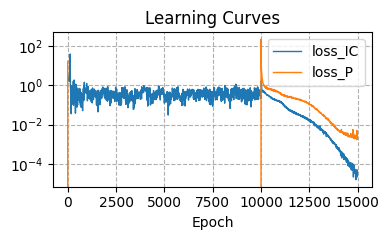

In [5]:
learning_curves(training_log)

### Pendulum Dynamics

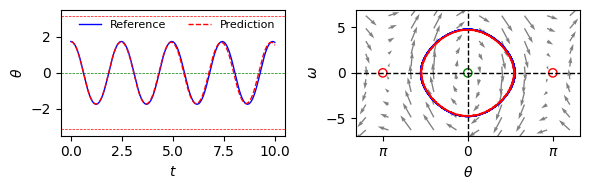

In [6]:
pendulum_dynamics(PINN)